# Shifting Images by non-integer amounts

## Method 1: Interpolation

We can use an interpolation method to take an array and shift it by a non integer amount. 

In [7]:
import numpy as np
from scipy.ndimage.interpolation import shift
import pyfits as pf
import matplotlib.pylab as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20,20)

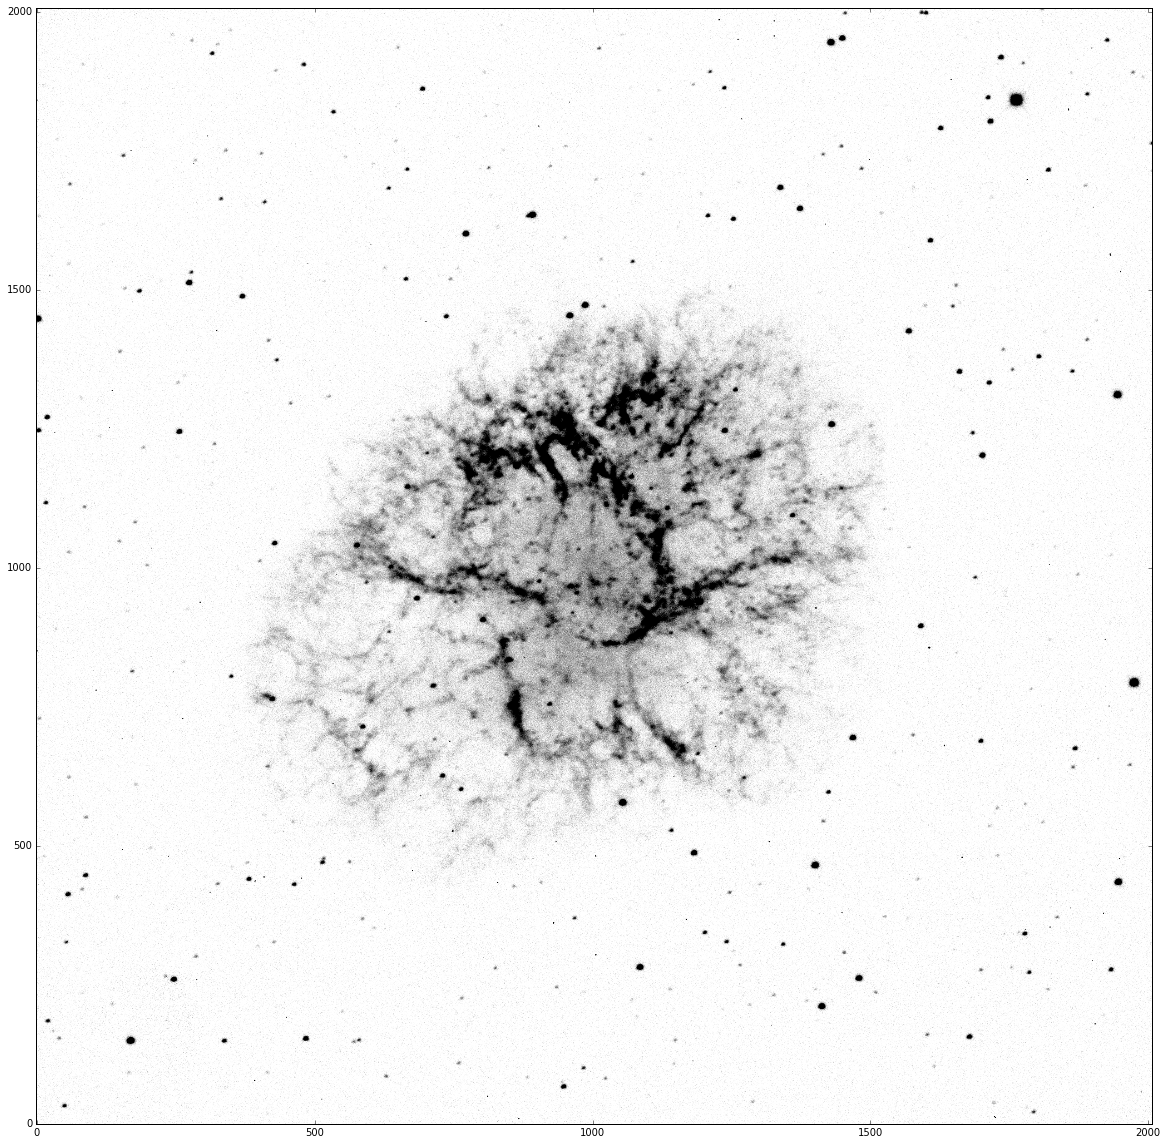

In [10]:
crab_nebula = pf.open('2011_09_13.fits')[0].data
plt.imshow(crab_nebula, origin='lower',cmap='gray_r',vmin=np.mean(crab_nebula),vmax=np.mean(crab_nebula)*2.0)
plt.show()

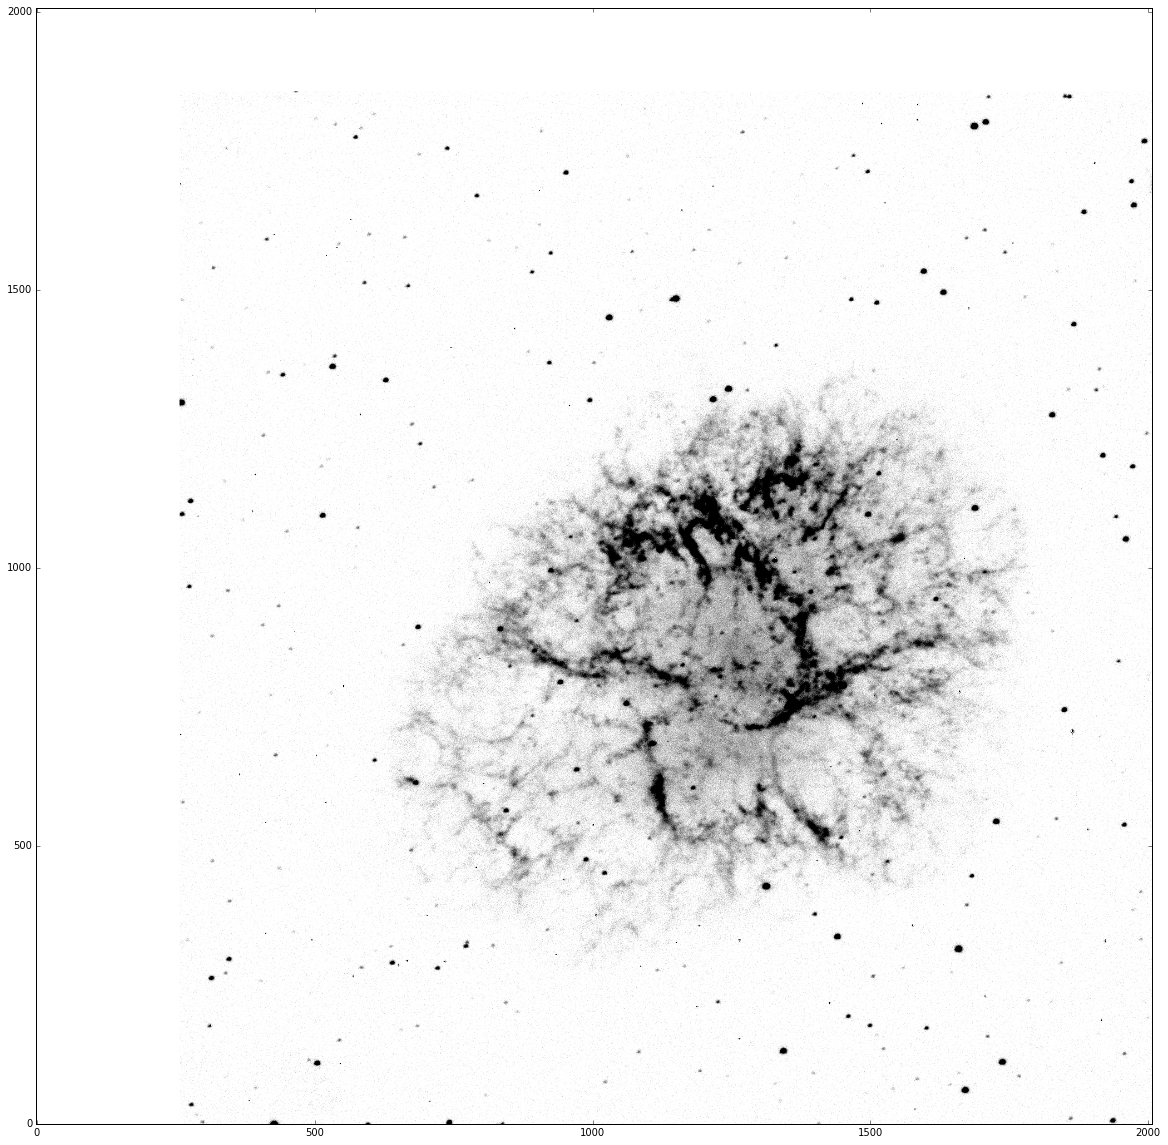

In [13]:
shifted_image = shift(crab_nebula, [-150.7,257.8])
plt.imshow(shifted_image, origin='lower',cmap='gray_r',vmin=np.mean(crab_nebula),vmax=np.mean(crab_nebula)*2.0)
plt.show()

## Now Lets use Fourier Shifting

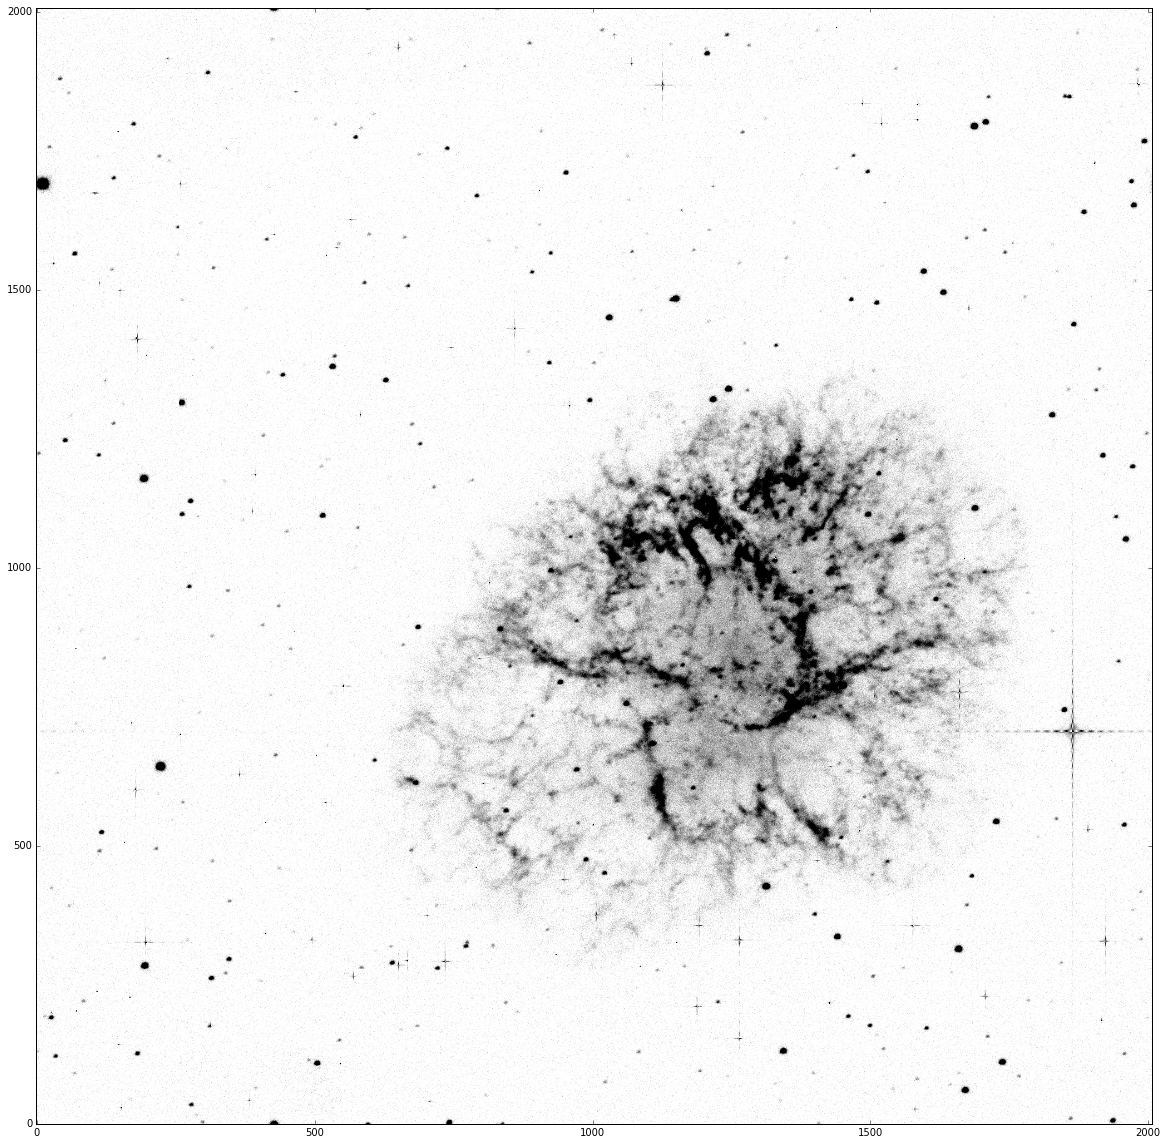

In [15]:
from scipy.ndimage.fourier import fourier_shift

step1 = np.fft.fft2(crab_nebula)
step2 = fourier_shift(step1,[-150.7,257.8])
step3 = np.fft.ifft2(step2)
output = np.real(step3)
plt.imshow(output, origin='lower',cmap='gray_r',vmin=np.mean(crab_nebula),vmax=np.mean(crab_nebula)*2.0)
plt.show()